<a href="https://colab.research.google.com/github/Adrita003/AdritaDatta_INSE_6220_Project/blob/main/Lung_Cancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [93]:
!pip install pycaret

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [94]:
from pycaret.utils import version
version()

'3.0.0'

In [95]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")
import pandas as pd
plt.rcParams['figure.figsize'] = (7,5)

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [96]:
print("Pandas version: ", pd.__version__)
print("Seaborn version: ", sns.__version__)

Pandas version:  1.5.3
Seaborn version:  0.12.2


In [97]:
df = pd.read_csv('https://raw.githubusercontent.com/Adrita003/AdritaDatta_INSE_6220_Project/main/Lung_Cancer.csv')
df.head(25)

,id,diagnosis,CEA,ProGRP,TTF-1,EGFR
0,842302,1,17.990,10.38,122.80,1001.0
1,842517,1,20.570,17.77,132.90,1326.0
2,84300903,1,19.690,21.25,130.00,1203.0
3,84348301,1,11.420,20.38,77.58,386.1
4,84358402,1,20.290,14.34,135.10,1297.0
5,843786,1,12.450,15.70,82.57,477.1
6,844359,1,18.250,19.98,119.60,1040.0
7,84458202,1,13.710,20.83,90.20,577.9
8,844981,1,13.000,21.82,87.50,519.8
9,84501001,1,12.460,24.04,83.97,475.9


In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id         500 non-null    int64  
 1   diagnosis  500 non-null    int64  
 2   CEA        500 non-null    float64
 3   ProGRP     500 non-null    float64
 4   TTF-1      500 non-null    float64
 5   EGFR       500 non-null    float64
dtypes: float64(4), int64(2)
memory usage: 23.6 KB


In [99]:
print("Number of duplicated rows is: ", df.duplicated().sum())

Number of duplicated rows is:  0


In [100]:
print("Number of rows with NaNs is: ", df.isna().any(axis=1).sum())

Number of rows with NaNs is:  0


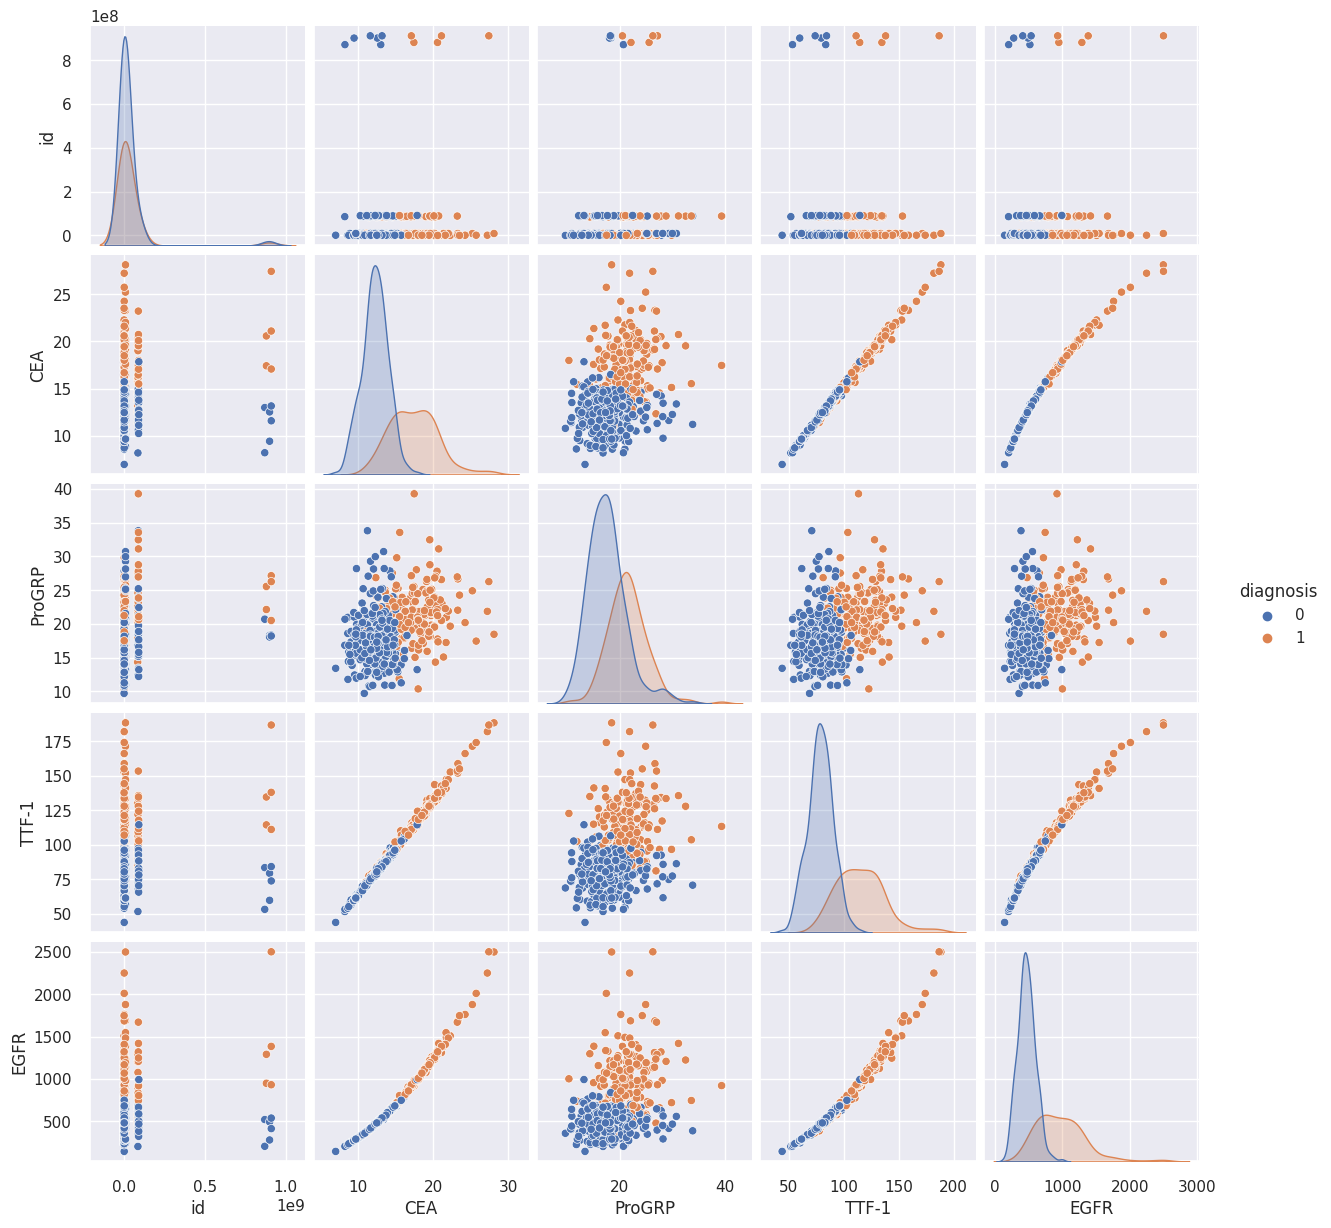

In [101]:
sns.pairplot(df, hue='diagnosis')
plt.show()

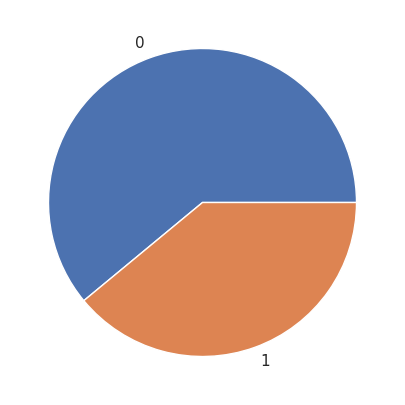

In [102]:
y =df['diagnosis']
y.value_counts().plot(kind='pie')
plt.ylabel('')
plt.show()

In [103]:

X = df.drop(columns=['diagnosis'])
X.head(10)

,id,CEA,ProGRP,TTF-1,EGFR
0,842302,17.99,10.38,122.80,1001.0
1,842517,20.57,17.77,132.90,1326.0
2,84300903,19.69,21.25,130.00,1203.0
3,84348301,11.42,20.38,77.58,386.1
4,84358402,20.29,14.34,135.10,1297.0
5,843786,12.45,15.70,82.57,477.1
6,844359,18.25,19.98,119.60,1040.0
7,84458202,13.71,20.83,90.20,577.9
8,844981,13.00,21.82,87.50,519.8
9,84501001,12.46,24.04,83.97,475.9


In [104]:
X.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,500.0,3.263049e+07,1.326933e+08,8670.000,866704.0000,901432.000,8.910808e+06,9.113205e+08
CEA,500.0,1.422421e+01,3.476809e+00,6.981,11.8075,13.435,1.611500e+01,2.811000e+01
ProGRP,500.0,1.908632e+01,4.164842e+00,9.710,16.0700,18.680,2.156250e+01,3.928000e+01
TTF-1,500.0,9.260662e+01,2.398348e+01,43.790,75.9950,86.735,1.062250e+02,1.885000e+02
EGFR,500.0,6.628448e+02,3.493572e+02,143.500,430.5500,556.150,8.007750e+02,2.501000e+03


In [105]:
Xs = StandardScaler().fit_transform(X)
Xcols = X.columns
X = pd.DataFrame(Xs)
X.columns = Xcols
X.head(10)
     

,id,CEA,ProGRP,TTF-1,EGFR
0,-0.239801,1.084203,-2.092526,1.260185,0.968905
1,-0.239800,1.827006,-0.316372,1.681730,1.900116
2,0.389787,1.573646,0.520031,1.560692,1.547688
3,0.390145,-0.807354,0.310930,-0.627168,-0.792948
4,0.390221,1.746391,-1.140757,1.773552,1.817023
5,-0.239790,-0.510808,-0.813887,-0.418900,-0.532208
6,-0.239786,1.159059,0.214792,1.126626,1.080650
7,0.390974,-0.148044,0.419086,-0.100445,-0.243389
8,-0.239781,-0.352459,0.657028,-0.213136,-0.409861
9,0.391297,-0.507929,1.190595,-0.360468,-0.535647


In [106]:
X.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,500.0,-1.776357e-17,1.001002,-0.246090,-0.239617,-0.239355,-0.178935,6.628596
CEA,500.0,3.517187e-16,1.001002,-2.085378,-0.695789,-0.227219,0.544375,3.997833
ProGRP,500.0,-1.705303e-16,1.001002,-2.253557,-0.724959,-0.097657,0.595139,4.853462
TTF-1,500.0,3.232969e-16,1.001002,-2.037466,-0.693321,-0.245065,0.568392,4.002315
EGFR,500.0,-2.238210e-16,1.001002,-1.488061,-0.665586,-0.305709,0.395207,5.266804


In [107]:
observations = list(df.index)
variables = list(df.columns)

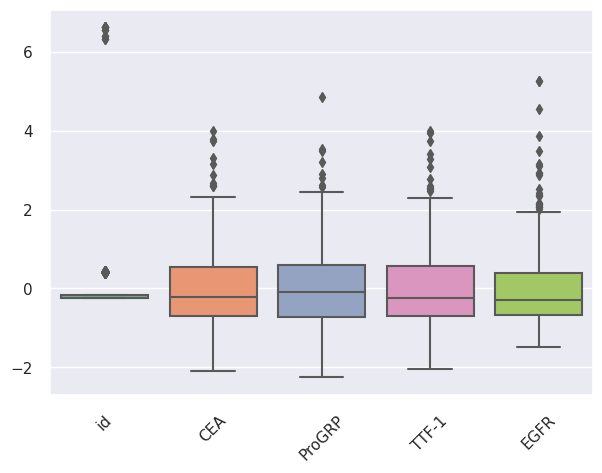

In [108]:
ax = plt.figure()
ax = sns.boxplot(data=X, orient="v", palette="Set2")
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

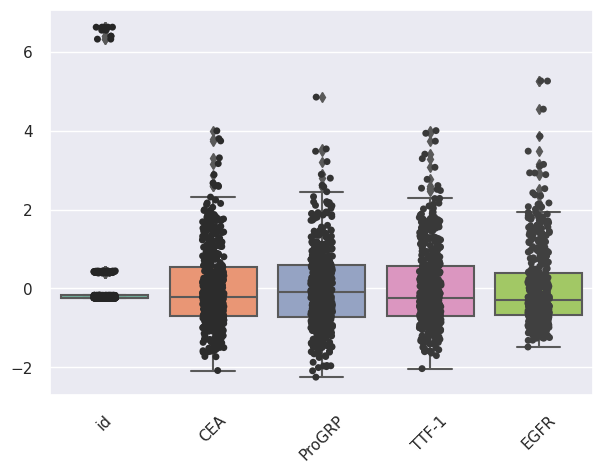

In [109]:
ax = plt.figure()    
ax = sns.boxplot(data=X, orient="v", palette="Set2")
ax = sns.stripplot(data=X, color=".25") 
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

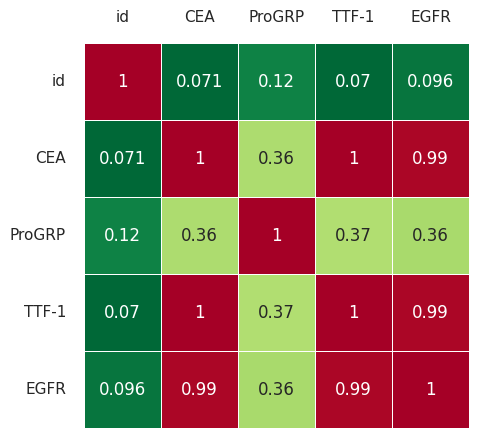

In [110]:
ax = sns.heatmap(X.corr(), cmap='RdYlGn_r', linewidths=0.5, annot=True, cbar=False, square=True)
plt.yticks(rotation=0)
ax.tick_params(labelbottom=False,labeltop=True)
ax.set_xticklabels(ax.get_xticklabels(),rotation=0);

Text(0, 0.5, 'Z2')

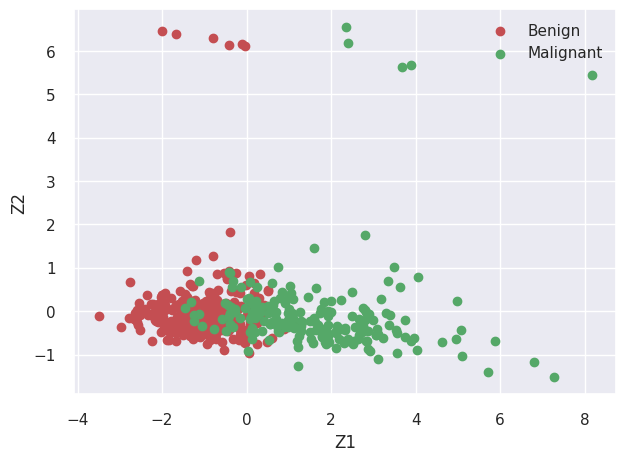

In [111]:

pca = PCA()
Z = pca.fit_transform(X)

idx_B = np.where(y == 0)
idx_M = np.where(y == 1)


plt. figure()
plt.scatter(Z[idx_B,0], Z[idx_B,1], c='r', label='Benign')
plt.scatter(Z[idx_M,0], Z[idx_M,1], c='g', label='Malignant')
plt.legend()
plt.xlabel('Z1')
plt.ylabel('Z2')
     
     

array([[ 7.62555527e-02,  9.26402120e-01, -3.68043477e-01,
        -2.25332540e-02,  6.73777221e-04],
       [ 5.52986446e-01, -1.06747455e-01, -1.31833618e-01,
        -3.85503885e-01, -7.18900287e-01],
       [ 2.80366480e-01,  3.34584267e-01,  8.99620087e-01,
         1.05023856e-02, -4.62656158e-03],
       [ 5.53315149e-01, -1.05944323e-01, -1.24449229e-01,
        -4.29718601e-01,  6.94602375e-01],
       [ 5.51024557e-01, -8.49309232e-02, -1.49532557e-01,
         8.16156009e-01,  2.62308667e-02]])

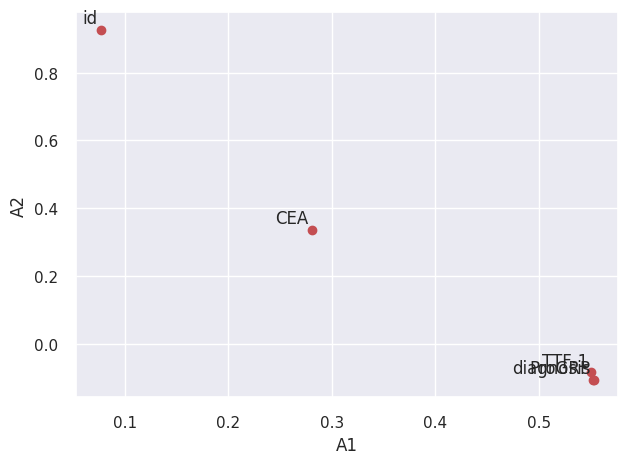

In [114]:
A = pca.components_.T 

plt.scatter(A[:,0],A[:,1],c='r')
plt.xlabel('A1')
plt.ylabel('A2')
for label, x, y in zip(variables, A[:, 0], A[:, 1]):
  plt.annotate(label, xy=(x, y), xytext=(-2, 2), textcoords='offset points', ha='right', va='bottom')
A

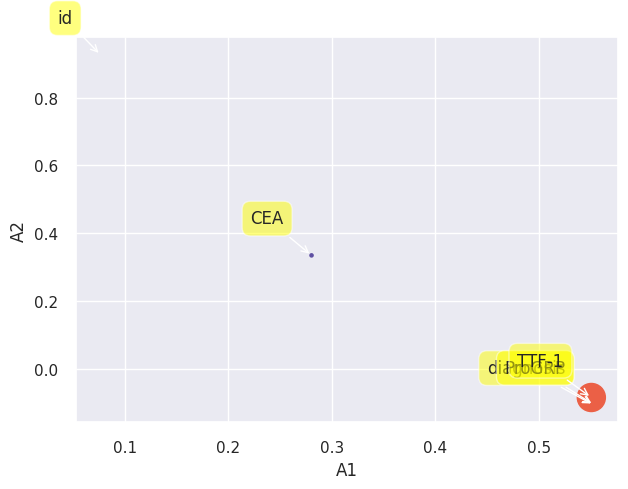

In [72]:
plt.scatter(A[:, 0],A[:, 1], marker='o', c=A[:, 2], s=A[:, 3]*500, cmap=plt.get_cmap('Spectral'))
plt.xlabel('A1')
plt.ylabel('A2')
for label, x, y in zip(variables,A[:, 0],A[:, 1]):
  plt.annotate(label,xy=(x, y), xytext=(-20, 20),
      textcoords='offset points', ha='right', va='bottom',
      bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
      arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))

Text(0, 0.5, 'Explained variance')

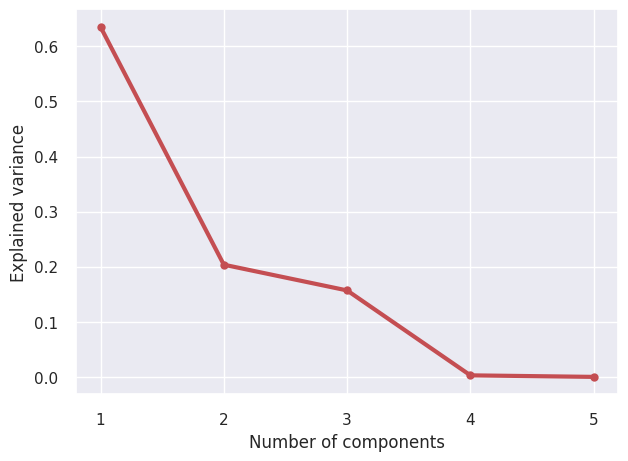

In [73]:
#Eigenvalues
Lambda = pca.explained_variance_ 

#Scree plot
x = np.arange(len(Lambda)) + 1
plt.plot(x,Lambda/sum(Lambda), 'ro-', lw=3)
plt.xticks(x, [""+str(i) for i in x], rotation=0)
plt.xlabel('Number of components')
plt.ylabel('Explained variance') 

Text(0, 0.5, 'Cumulative explained variance')

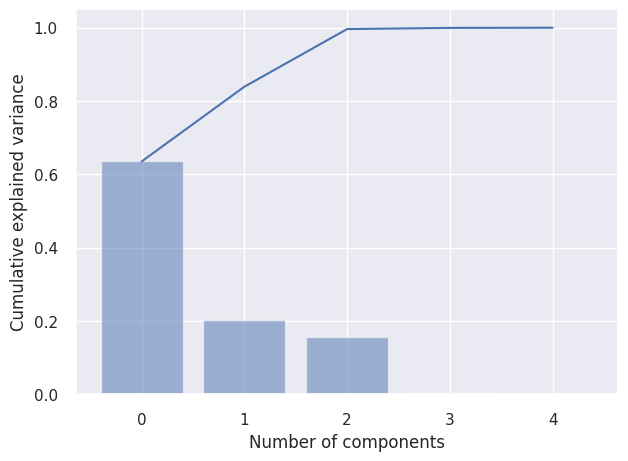

In [74]:
ell = pca.explained_variance_ratio_
ind = np.arange(len(ell))
plt.bar(ind, ell, align='center', alpha=0.5)
plt.plot(np.cumsum(ell))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

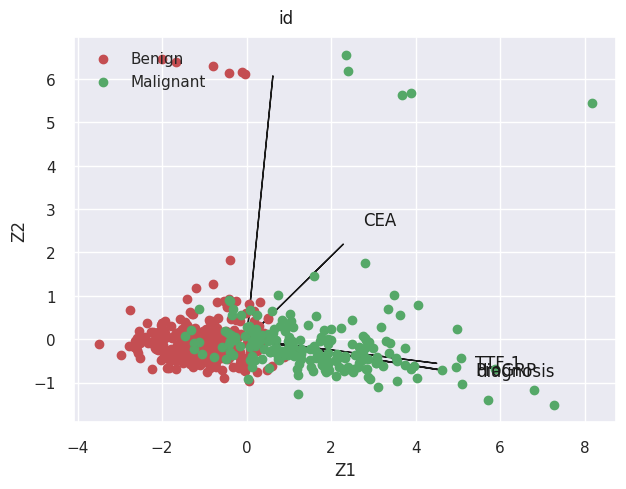

In [75]:

A1 = A[:,0] 
A2 = A[:,1]
Z1 = Z[:,0] 
Z2 = Z[:,1]

plt.figure()
plt.xlabel('Z1')
plt.ylabel('Z2')
for i in range(len(A1)):
# arrows project features as vectors onto PC axes
  plt.arrow(0, 0, A1[i]*max(Z1), A2[i]*max(Z2), color='k', width=0.0005, head_width=0.0025)
  plt.text(A1[i]*max(Z1)*1.2, A2[i]*max(Z2)*1.2,variables[i], color='k')

plt.scatter(Z[idx_B,0], Z[idx_B,1], c='r', label='Benign')
plt.scatter(Z[idx_M,0], Z[idx_M,1], c='g', label='Malignant')
plt.legend(loc='upper left')

In [76]:
!pip3 install pca

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [77]:
from pca import pca
# Initialize and keep all PCs
model = pca()
# Fit transform
out = model.fit_transform(X)

[pca] >Extracting column labels from dataframe.
[pca] >Extracting row labels from dataframe.
[pca] >The PCA reduction is performed to capture [95.0%] explained variance using the [5] columns of the input data.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Number of components is [3] that covers the [95.00%] explained variance.
[pca] >The PCA reduction is performed on the [5] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[3]
[pca] >Multiple test correction applied for Hotelling T2 test: [fdr_bh]
[pca] >Outlier detection using SPE/DmodX with n_std=[3]


In [78]:
out['PC']

,PC1,PC2,PC3
0,1.225759,-1.253814,-2.238867
1,2.880861,-0.862581,-0.930638
2,2.762097,0.070318,-0.308745
3,-1.113486,0.685437,0.439187
4,2.658215,-0.548820,-1.892521
...,...,...,...
495,0.269934,-0.171064,0.280523
496,-0.839471,-0.159973,0.077130
497,-0.986493,-0.212354,-0.087996
498,1.857674,-0.704177,-0.735152


[pca]> [WARNING]: De parameter <label> is deprecated and will not be supported in future version.


(<Figure size 2500x1500 with 1 Axes>,
 <AxesSubplot: title={'center': '3 Principal Components explain [99.95%] of the variance'}, xlabel='PC1 (63.5% expl.var)', ylabel='PC2 (20.3% expl.var)'>)

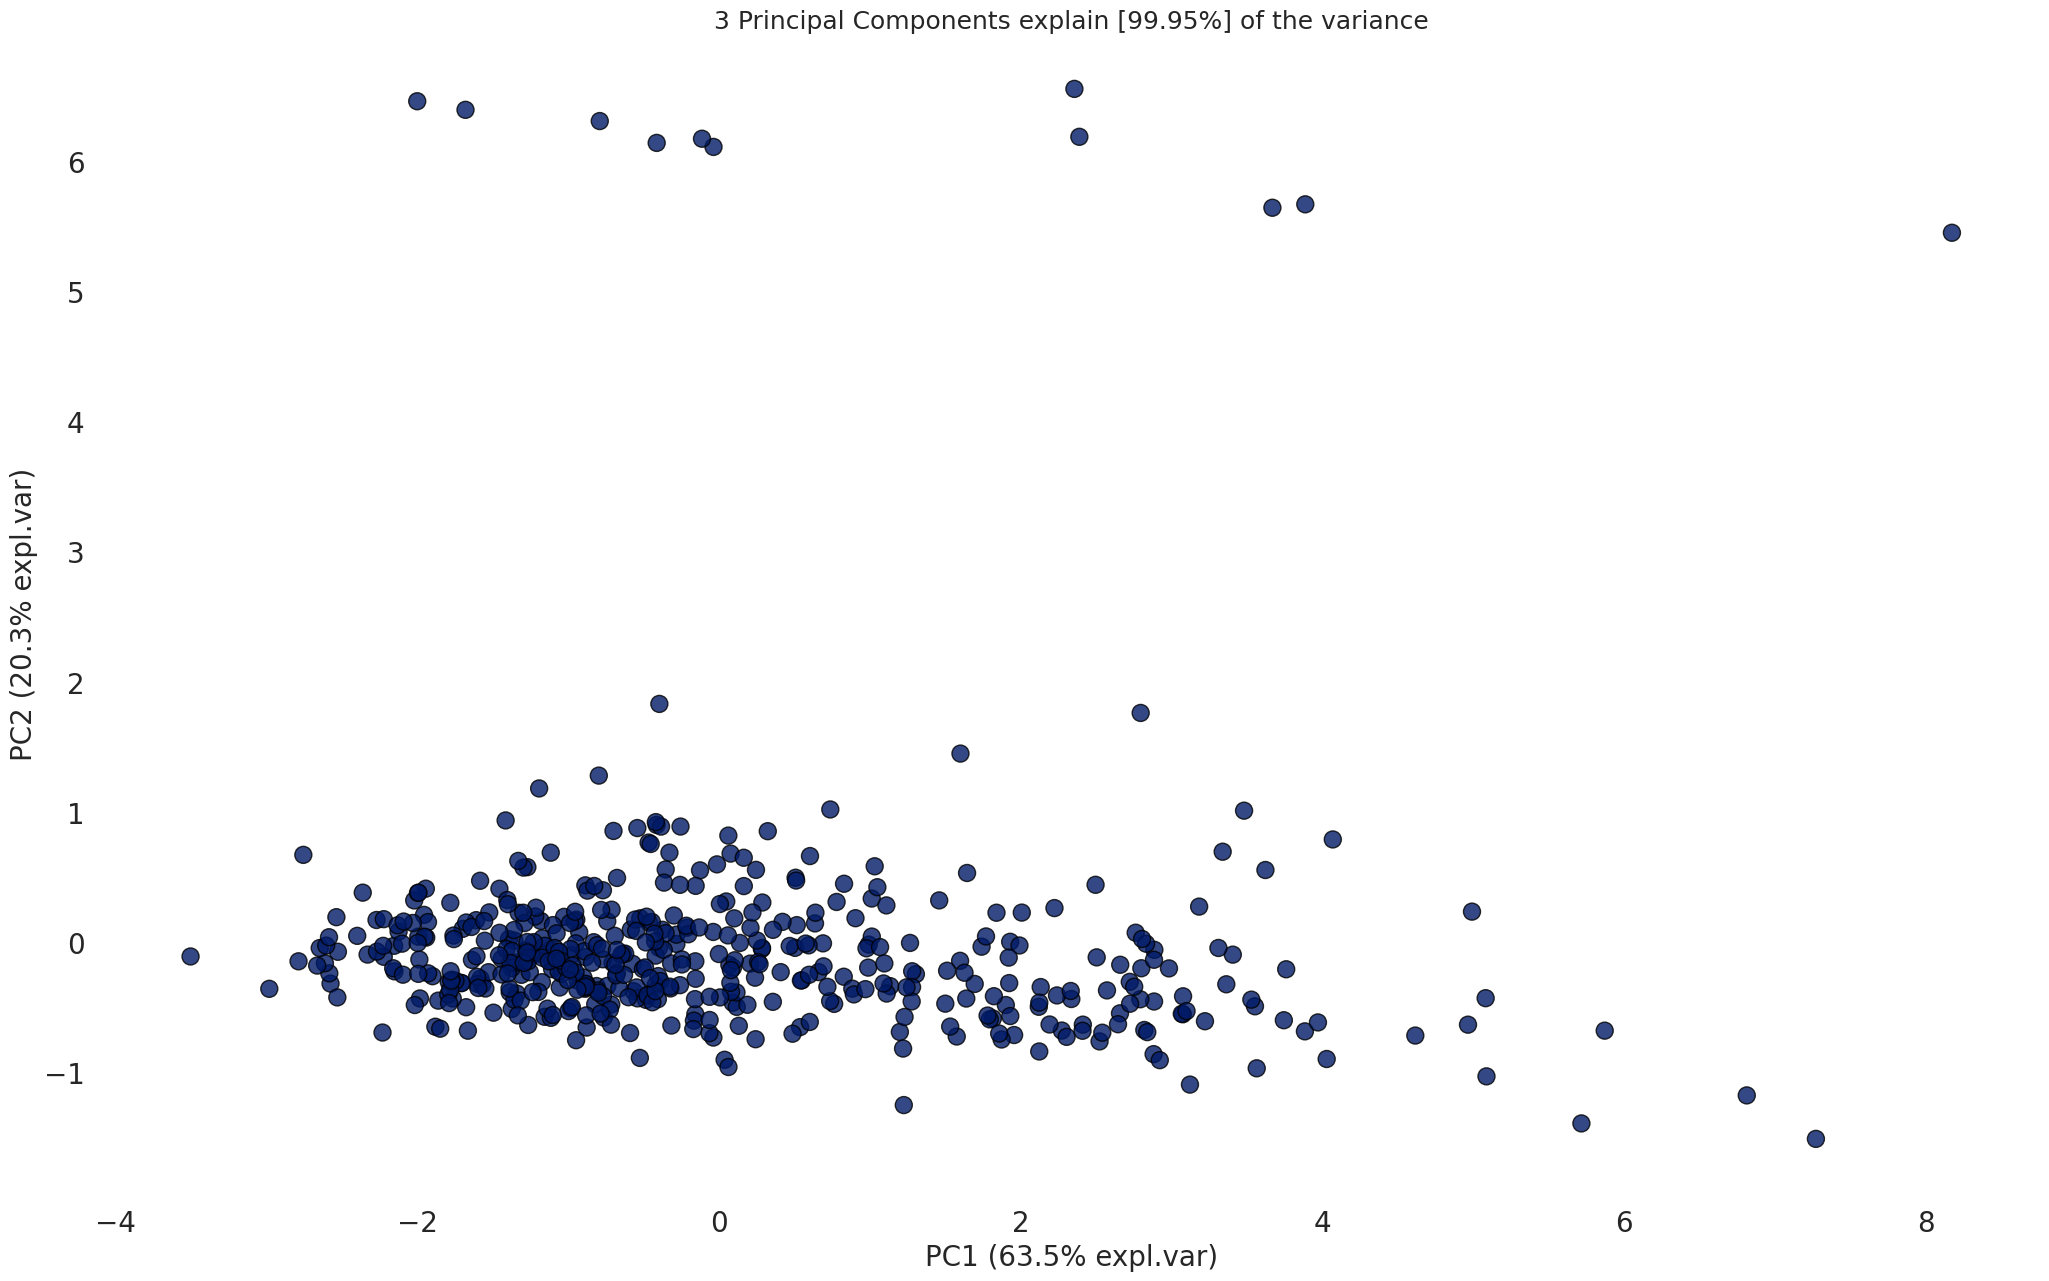

In [79]:
model.scatter(label=True, legend=False)

In [80]:
A = out['loadings'].T

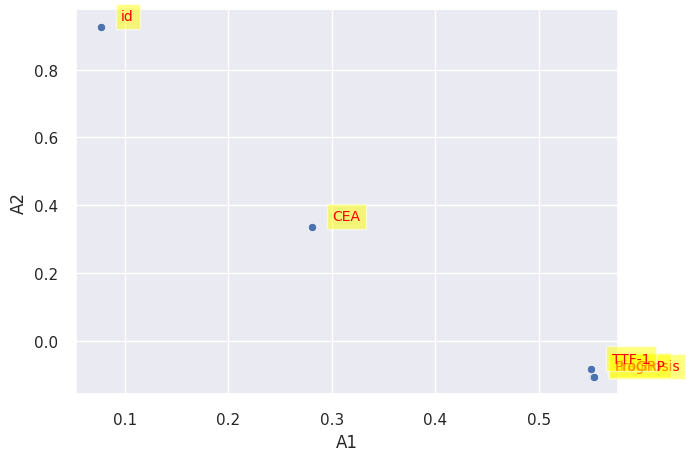

In [81]:
sns.scatterplot(data=A, x="PC1", y="PC2")
plt.xlabel('A1')
plt.ylabel('A2')
for i in range(A.shape[0]):
 plt.text(x=A.PC1[i]+0.02,y=A.PC2[i]+0.02, s=variables[i],
          fontdict=dict(color='red',size=10),
          bbox=dict(facecolor='yellow',alpha=0.5))

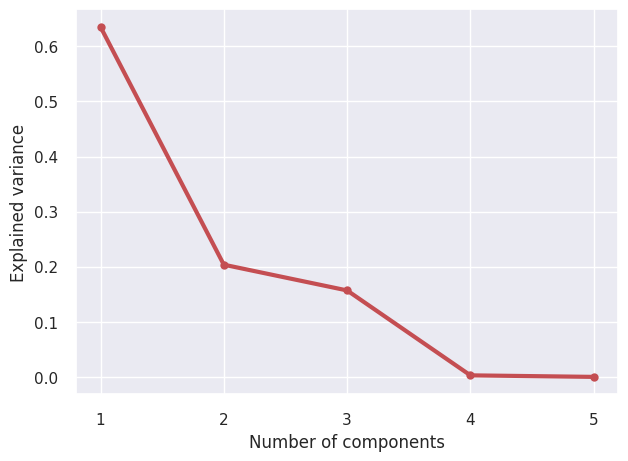

In [82]:
VR = out['variance_ratio']
x = np.arange(len(VR)) + 1
plt.plot(x, VR, 'ro-', lw=3)
plt.xticks(x, [""+str(i) for i in x], rotation=0)
plt.xlabel('Number of components')
plt.ylabel('Explained variance') 
plt.show()

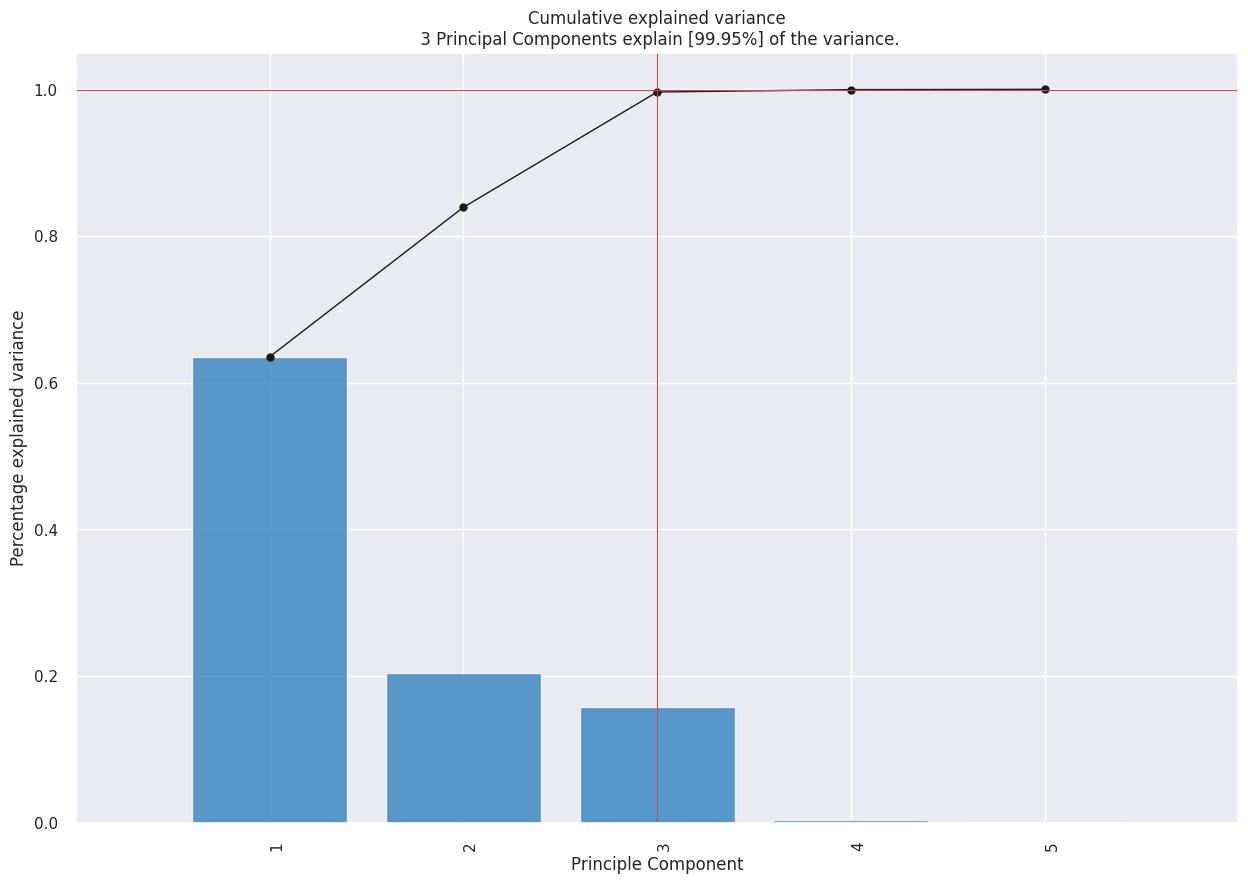

<Figure size 700x500 with 0 Axes>

In [83]:
model.plot();

[pca]> [WARNING]: De parameter <label> is deprecated and will not be supported in future version.
[pca] >Plot PC1 vs PC2 with loadings.


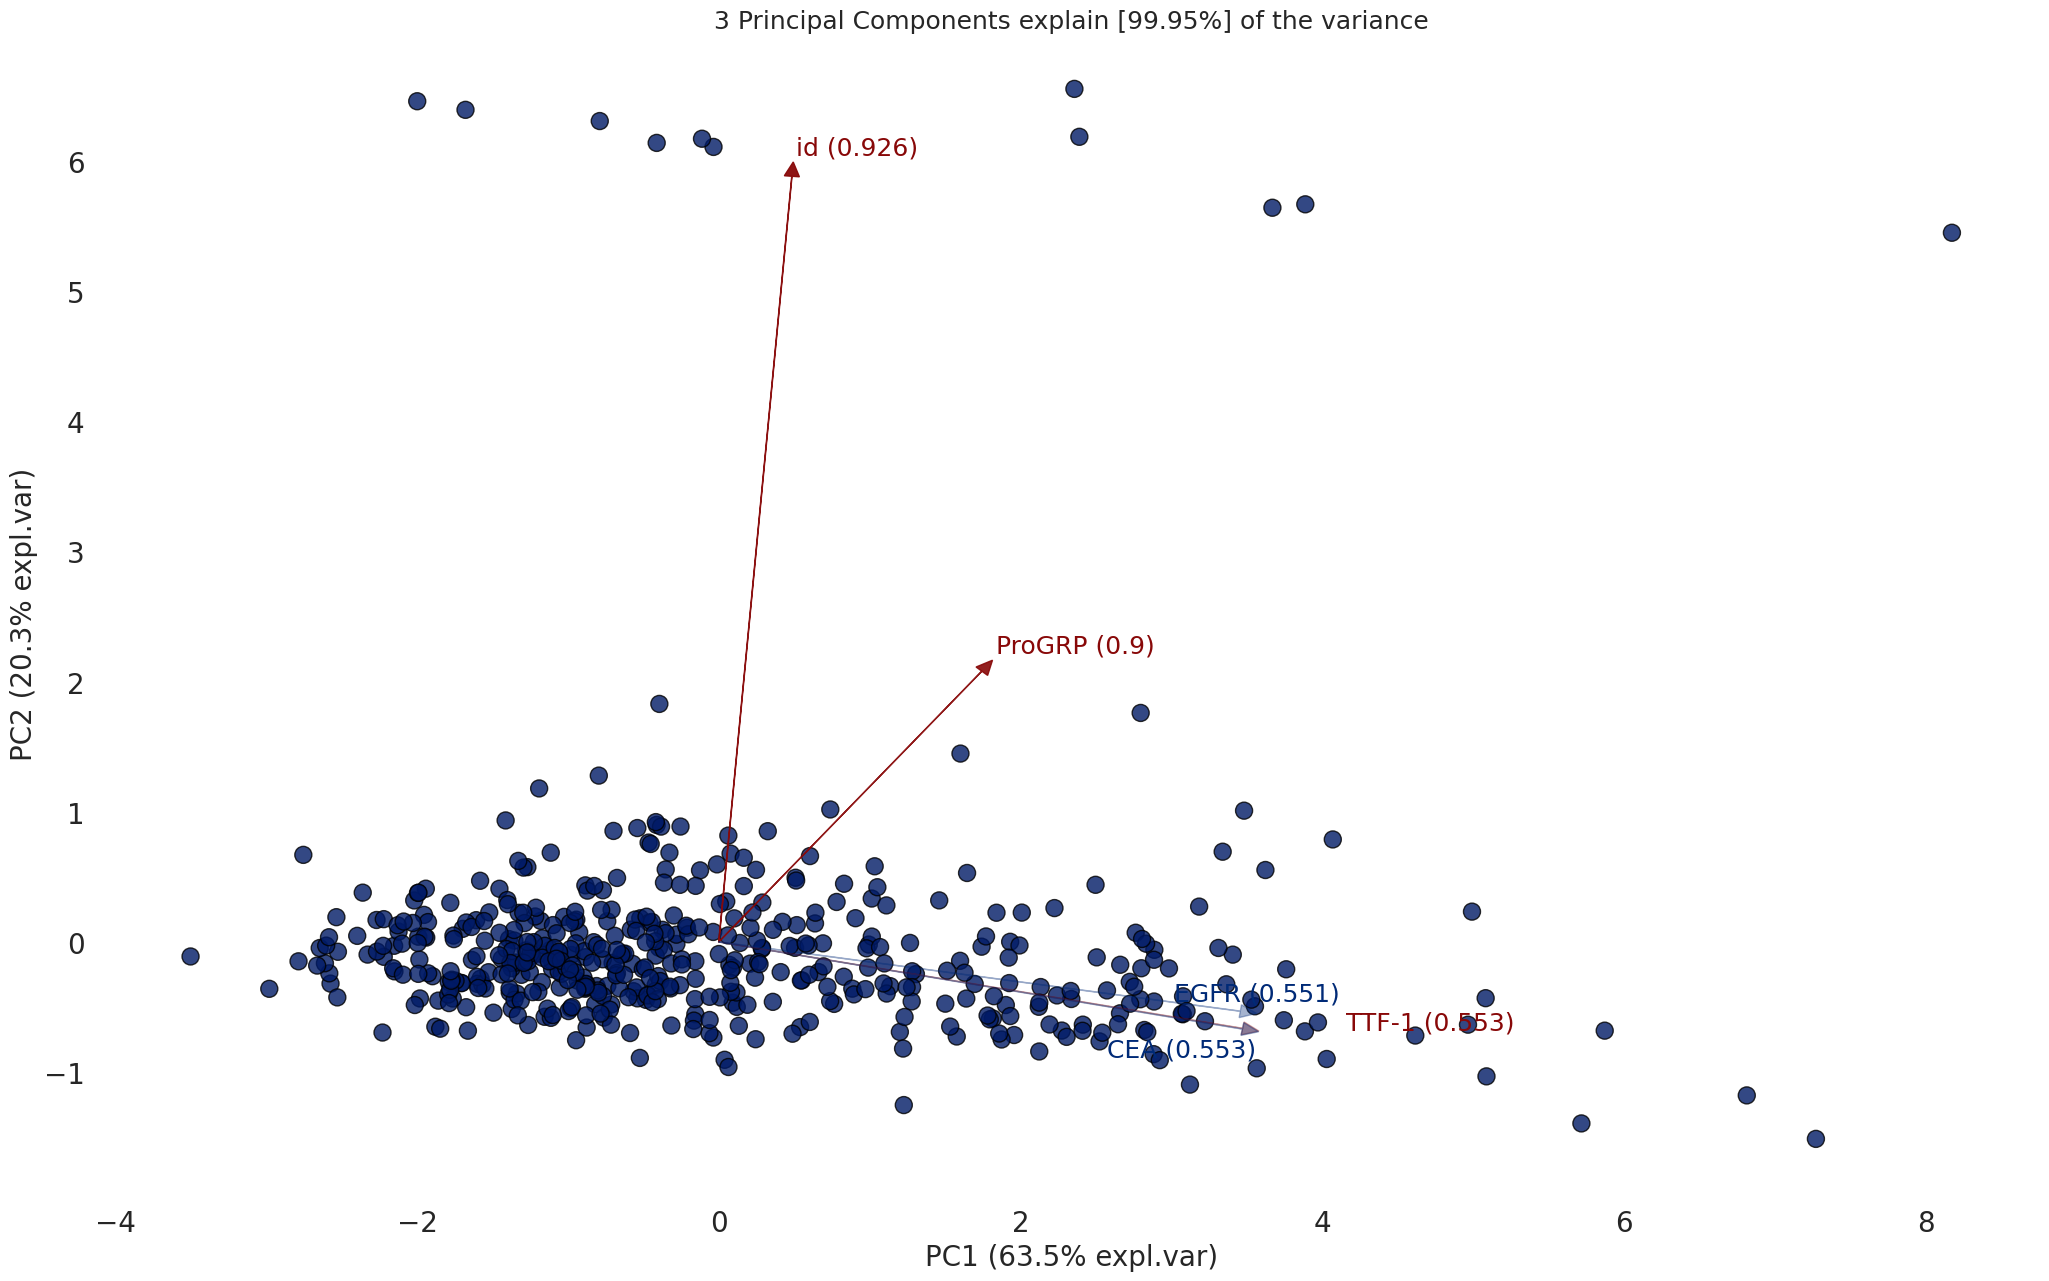

(<Figure size 2500x1500 with 1 Axes>,
 <AxesSubplot: title={'center': '3 Principal Components explain [99.95%] of the variance'}, xlabel='PC1 (63.5% expl.var)', ylabel='PC2 (20.3% expl.var)'>)

In [84]:
model.biplot(label=False, legend=False)

In [85]:
!pip install pycaret

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [86]:
from pycaret.utils import version
version()

'3.0.0'

In [92]:
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (7,5)

#read cvs file into dataframe
df = pd.read_csv('https://raw.githubusercontent.com/Adrita003/AdritaDatta_INSE_6220_Project/main/Lung_Cancer.csv')
df.head(25)

,id,diagnosis,CEA,ProGRP,TTF-1,EGFR
0,842302,1,17.990,10.38,122.80,1001.0
1,842517,1,20.570,17.77,132.90,1326.0
2,84300903,1,19.690,21.25,130.00,1203.0
3,84348301,1,11.420,20.38,77.58,386.1
4,84358402,1,20.290,14.34,135.10,1297.0
5,843786,1,12.450,15.70,82.57,477.1
6,844359,1,18.250,19.98,119.60,1040.0
7,84458202,1,13.710,20.83,90.20,577.9
8,844981,1,13.000,21.82,87.50,519.8
9,84501001,1,12.460,24.04,83.97,475.9


In [88]:
from pycaret.classification import *
clf_pca = setup(data=df, target='diagnosis', train_size=0.7, session_id=123, normalize = True, pca = True, pca_components = 3)

,Description,Value
0,Session id,123
1,Target,diagnosis
2,Target type,Binary
3,Original data shape,"(500, 6)"
4,Transformed data shape,"(500, 4)"
5,Transformed train set shape,"(350, 4)"
6,Transformed test set shape,"(150, 4)"
7,Numeric features,5
8,Preprocess,True
9,Imputation type,simple


In [89]:
best_model_pca = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.8971,0.9584,0.8148,0.9199,0.8582,0.7780,0.7868,1.0000
rf,Random Forest Classifier,0.8857,0.9365,0.8374,0.8799,0.8522,0.7589,0.7660,0.2800
ada,Ada Boost Classifier,0.8829,0.9370,0.8451,0.8580,0.8488,0.7530,0.7560,0.3590
ridge,Ridge Classifier,0.8800,0.0000,0.7423,0.9403,0.8243,0.7357,0.7514,0.0970
lda,Linear Discriminant Analysis,0.8800,0.9570,0.7423,0.9403,0.8243,0.7357,0.7514,0.1230
knn,K Neighbors Classifier,0.8771,0.9226,0.8005,0.8910,0.8364,0.7382,0.7479,0.1750
et,Extra Trees Classifier,0.8771,0.9331,0.8148,0.8752,0.8361,0.7380,0.7468,0.2740
nb,Naive Bayes,0.8743,0.9441,0.7566,0.9149,0.8216,0.7261,0.7390,0.1150
qda,Quadratic Discriminant Analysis,0.8743,0.9413,0.7709,0.9083,0.8246,0.7278,0.7418,0.2120
xgboost,Extreme Gradient Boosting,0.8743,0.9299,0.8154,0.8687,0.8350,0.7335,0.7413,0.1530


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [41]:
best_model_pca

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [42]:
tuned_best_model_pca = tune_model(best_model_pca)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8857,0.9720,0.6923,1.0000,0.8182,0.7388,0.7654
1,0.8571,0.8881,0.6923,0.9000,0.7826,0.6789,0.6919
2,0.9143,0.9790,0.7692,1.0000,0.8696,0.8073,0.8228
3,0.9429,0.9932,0.9286,0.9286,0.9286,0.8810,0.8810
4,0.8571,0.9354,0.9286,0.7647,0.8387,0.7126,0.7235
5,0.9429,0.9830,0.8571,1.0000,0.9231,0.8780,0.8847
6,0.9143,0.9252,0.8571,0.9231,0.8889,0.8193,0.8208
7,0.9143,0.9830,0.8571,0.9231,0.8889,0.8193,0.8208
8,0.8571,0.9388,0.8571,0.8000,0.8276,0.7059,0.7071


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [90]:
tuned_best_model_pca

LogisticRegression(C=0.049, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=1000, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

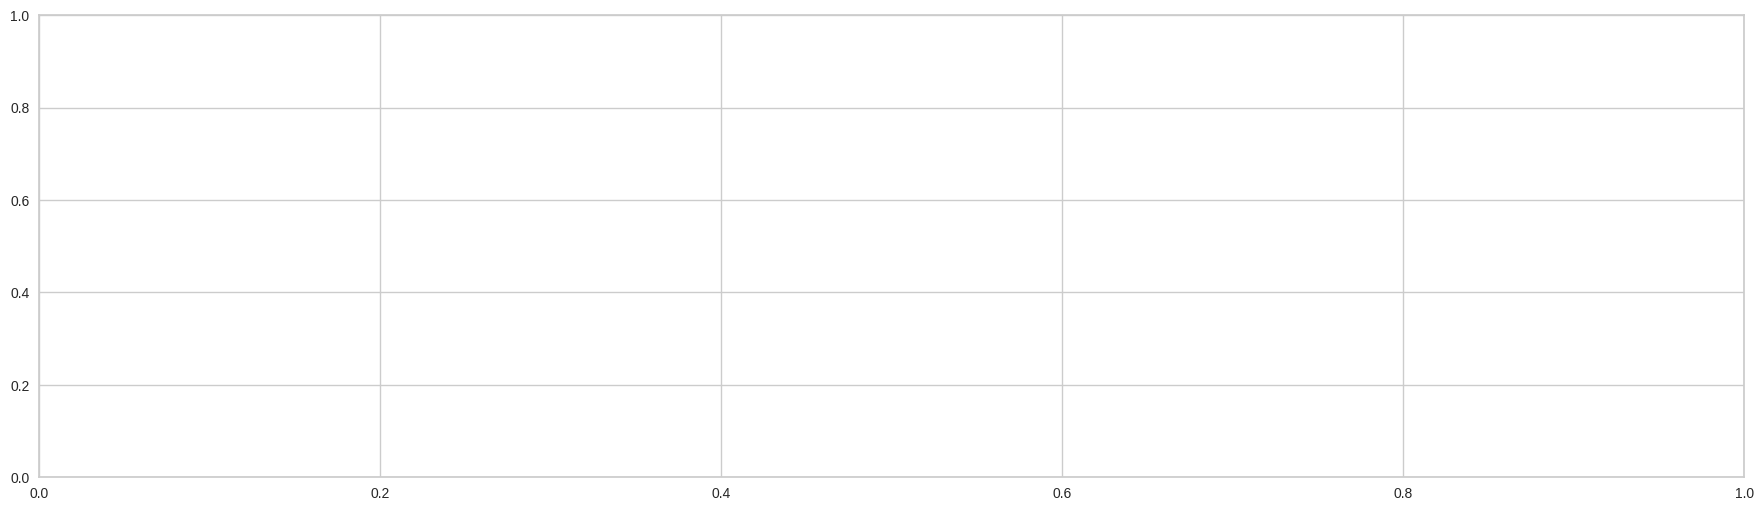

In [44]:
evaluate_model(tuned_best_model_pca)

In [45]:
!pip install pycaret[analysis]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [46]:
rf_pca = create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9143,0.9003,0.7692,1.0000,0.8696,0.8073,0.8228
1,0.8571,0.8374,0.6923,0.9000,0.7826,0.6789,0.6919
2,0.9143,0.9860,0.7692,1.0000,0.8696,0.8073,0.8228
3,0.9429,0.9983,0.8571,1.0000,0.9231,0.8780,0.8847
4,0.8286,0.8929,0.8571,0.7500,0.8000,0.6512,0.6556
5,0.8857,0.9711,0.8571,0.8571,0.8571,0.7619,0.7619
6,0.8857,0.9048,0.8571,0.8571,0.8571,0.7619,0.7619
7,0.8571,0.9575,0.9286,0.7647,0.8387,0.7126,0.7235
8,0.8857,0.9473,0.8571,0.8571,0.8571,0.7619,0.7619


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [47]:
tuned_rf_pca = tune_model(rf_pca)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9143,0.9441,0.7692,1.0000,0.8696,0.8073,0.8228
1,0.8571,0.8322,0.7692,0.8333,0.8000,0.6892,0.6905
2,0.9429,0.9825,0.8462,1.0000,0.9167,0.8736,0.8807
3,0.9429,0.9966,0.9286,0.9286,0.9286,0.8810,0.8810
4,0.8286,0.9371,0.8571,0.7500,0.8000,0.6512,0.6556
5,0.9143,0.9830,0.9286,0.8667,0.8966,0.8235,0.8250
6,0.9143,0.9082,0.9286,0.8667,0.8966,0.8235,0.8250
7,0.8857,0.9490,1.0000,0.7778,0.8750,0.7727,0.7935
8,0.8857,0.9439,0.9286,0.8125,0.8667,0.7674,0.7727


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


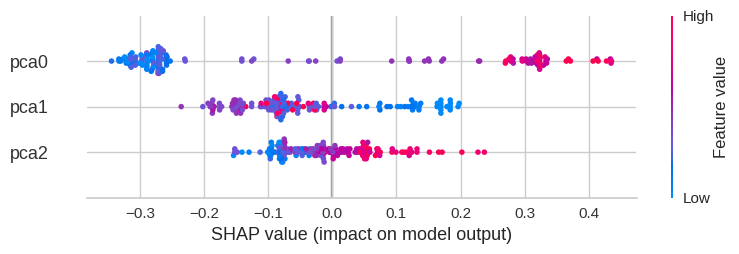

In [48]:
interpret_model(tuned_rf_pca, plot='summary')

In [49]:
interpret_model(tuned_rf_pca, plot='reason', observation=32)

In [50]:
interpret_model(tuned_rf_pca, plot='reason')